In [1]:
import matplotlib.pyplot as plt

import os
from matplotlib import rcParams

def k_list(data_list:list,k:int):
    if not len(data_list) > 10 or k < 1:
        return data_list
    avg_k_list = []
    l = len(data_list)
    step = l // k
    low = up = 0
    while( up<= len(data_list)):

        up = low+step
        end = min(l,up)
        if (low == end):break
        tmp = data_list[low:end]
        
        avg_k_list.append(sum(tmp) / len(tmp))
        low = up
    return avg_k_list

def sort_by_indexes(lst, indexes, reverse=False):
    return [val for (_, val) in sorted(zip(indexes, lst), key=lambda x:x[0], reverse=reverse)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


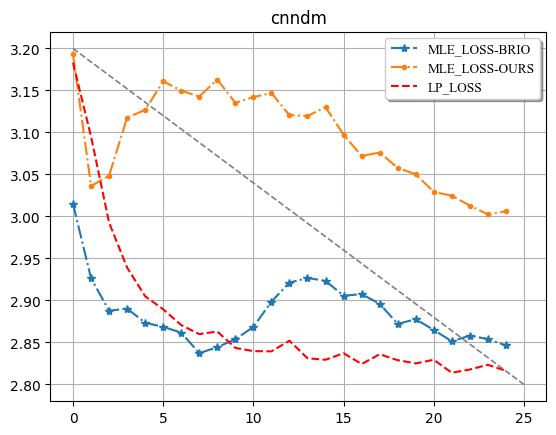

In [4]:
K  = 25
end = 500
with open('./loss_res-cnndam/mle_loss.txt','r') as f:
    brio_cnndm_mle = f.readlines()[:end]
    brio_cnndm_mle= [float(d.replace('\n','0'))  for d in brio_cnndm_mle]
    brio_cnndm_mle = k_list(brio_cnndm_mle,K)
    f.close()
with open('./loss_res-ours-cnndam/mle_loss.txt','r') as f:
    ours_cnndm_mle = f.readlines()[:end]
    ours_cnndm_mle= [float(d.replace('\n','0'))  for d in ours_cnndm_mle]
    ours_cnndm_mle = k_list(ours_cnndm_mle,K)
    f.close()
with open('./loss_res-ours-cnndam/lp_loss.txt','r') as f:
    ours_cnndm_lp = f.readlines()[:end]
    ours_cnndm_lp= [float(d.replace('\n','0')) *.08 for d in ours_cnndm_lp]
    ours_cnndm_lp = k_list(ours_cnndm_lp,K)
    f.close()
plt.grid()
plt.title('cnndm')

plt.plot(brio_cnndm_mle,marker='*',label='MLE_LOSS-BRIO',linestyle = '-.',)
plt.plot(ours_cnndm_mle,label='MLE_LOSS-OURS',linestyle = '-.',marker = '.',)
plt.plot(ours_cnndm_lp,c= 'red',label='LP_LOSS',linestyle='--')
plt.plot([0,25],[3.20,2.80],c='gray',linewidth=1.2,linestyle='--')
plt.legend(prop = {'size':9.5,'family': 'Times New Roman'},frameon=True,shadow=True)
#plt.savefig(f'././figures/cnndm.png',dpi=720)
plt.savefig(f'././figures/cnndm.eps',format = 'eps',dpi=720)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


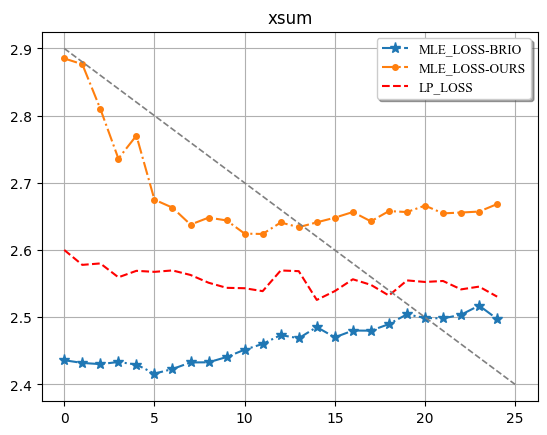

In [5]:
K  = 25
end =300
with open('./loss_res-xsum/mle_loss.txt','r') as f:
    brio_xsum_mle = f.readlines()[:end]
    brio_xsum_mle= [float(d.replace('\n','0'))  for d in brio_xsum_mle]
    brio_xsum_mle = k_list(brio_xsum_mle,K)
    f.close()
with open('./loss_res-ours-xsum/mle_loss.txt','r') as f:
    ours_xsum_mle = f.readlines()[:end]
    ours_xsum_mle= [float(d.replace('\n','0'))  for d in ours_xsum_mle]
    ours_xsum_mle = k_list(ours_xsum_mle,K)
    f.close()
with open('./loss_res-ours-xsum/lp_loss.txt','r') as f:
    ours_xsum_lp = f.readlines()[:end]
    ours_xsum_lp= [float(d.replace('\n','0')) *.215 for d in ours_xsum_lp]
    ours_xsum_lp = k_list(ours_xsum_lp,K)
    f.close()
plt.title('xsum')
plt.grid()
plt.plot(brio_xsum_mle,marker='*',label='MLE_LOSS-BRIO',linestyle = '-.',markersize = 8)
plt.plot(ours_xsum_mle,label='MLE_LOSS-OURS',linestyle = '-.',marker = '.',markersize = 8)
plt.plot(ours_xsum_lp,c= 'red',label='LP_LOSS',markersize = 8,linestyle='--')
plt.plot([0,25],[2.90,2.40],c='gray',linewidth=1.2,linestyle='--')

plt.legend(prop = {'size':9.5,'family': 'Times New Roman'},frameon=True,shadow=True)
#plt.savefig(f'./figures/xsum.png',dpi=720)
plt.savefig(f'././figures/xsum.eps',format = 'eps',dpi=720)

['acc.txt', 'acc_rank_loss.txt', 'contraste_loss.txt', 'loss.txt', 'lp_loss.txt', 'mle_loss.txt']
contraste_loss.txt
lp_loss.txt
mle_loss.txt


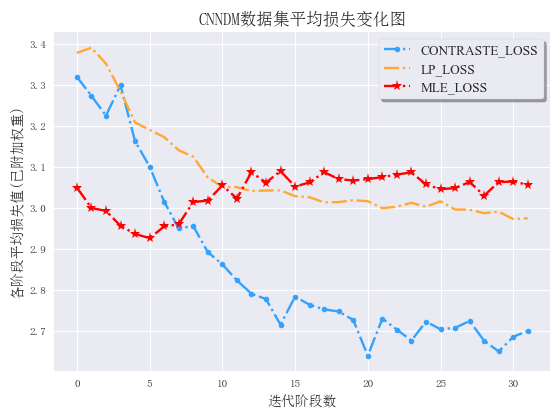

<Figure size 640x440 with 0 Axes>

In [19]:


config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['SimSun'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

# plt.rcParams['font.sans-serif'] = [u'SimSun']
# plt.rcParams['axes.unicode_minus'] = False
K =30
step = 1
start = 0
end = 800
data_name = 'xsum'
LOSSES_DIR = f'./loss_res-{data_name}'
#LOSSES_DIR = f'./loss_res-ours-cnndam'
LOSSES_DIR = f'./loss_res-ours-cnndam'
#COLORS = ['y', '#33A2FF','#FFA833','black','red','y']
COLORS = [ '#33A2FF','#FFA833','red']
plt.style.use('seaborn-v0_8-paper')
plt.xlabel('迭代阶段数',fontsize = 10)
plt.ylabel("各阶段平均损失值(已附加权重)",fontsize = 10)
plt.title(f'CNNDM数据集平均损失变化图', fontsize=12)
plt.style.use('seaborn-v0_8-colorblind')
list_dir = os.listdir(LOSSES_DIR)
list_dir = [f for f in list_dir if not f.startswith('.')]
list_dir = [f for f in list_dir if not f.startswith('old')]
print(list_dir)
plt.style.use('seaborn-v0_8-colorblind')
j = 0
for i,fname in enumerate(list_dir):
    if(fname.startswith('.') or  fname.startswith('loss') or fname.startswith('acc')):
        continue

    print(fname)
    path = os.path.join(LOSSES_DIR,fname)
    with open(path,'r')as f:
        data = f.readlines()[start:end]
    name = fname.replace('.txt','')
    scale = 1
    line_style = '-.'
    marker = ''
    if(name.startswith('acc_rank')):
        scale = 1.3
        line_style = 'dashed'
        marker = '.'
    elif name.startswith('loss'):
        line_style = '-.'
        scale =1
        marker = '+'
    elif name.startswith('mle_loss'):
        line_style  = '-.'
        marker = '*'
        scale = 1
    elif name.startswith('lp'):
        scale = 0.085
    elif name.startswith('con'):
        scale = 27
        marker = '.'
    loss_list =[float(d.replace('\n','0')) * scale for d in data]
    #print(f'{name}: {loss_list[-1] / scale}')
    loss_list = [loss_list[i] for i in range(0,len(loss_list),step)]
    loss_list = k_list(loss_list,K)
    plt.grid()
    plt.plot(loss_list,c= COLORS[j],label=name.upper(),linestyle = line_style,marker = marker,linewidth =1.7,markersize = 8)
    plt.legend(prop = {'size':9.5,'family': 'Times New Roman'},frameon=True,shadow=True)
    f.close()
    j+=1
plt.show()
plt.savefig(f'./figures/{data_name}.png')